# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df = clean_hospital_read_df.dropna(subset = ['Number of Readmissions'])


C:\Users\zackb\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


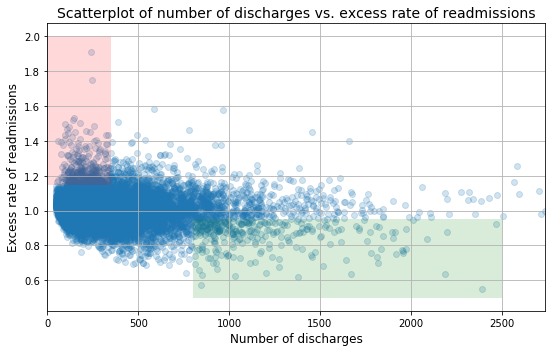

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****


## A. Do you agree with the above analysis and recommendations? Why or why not?
 I do not agree with the initial observaitions based on the graph these conclusions are misleading, the statistics does not consider discharges between 100 and 1000 and the conclusion is unfounded since there is excess readmission in hospitals with discharges greater than 2500 as well. Statistical analysis would be required to make such assertions

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## Setup an appropriate hypothesis test.

    null hypothesis: hospitals with a low number discharges have same mean readmission ratio as those with a higher number of discharges

## Compute and report the observed significance value (or p-value).

In [5]:
# seperarate data
low = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<=300]
high = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>300]
# preform 2 sample ttest for null hypothesis 
print(stats.ttest_ind(low['Excess Readmission Ratio'], high['Excess Readmission Ratio'], equal_var=True))
print('Difference of means :',np.mean(low['Excess Readmission Ratio'])-np.mean(high['Excess Readmission Ratio']))
print('Low mean :',np.mean(low['Excess Readmission Ratio']))
print('High mean :',np.mean(high['Excess Readmission Ratio']))

Ttest_indResult(statistic=8.4479918223645623, pvalue=3.319407529146751e-17)
Difference of means : 0.014479507404359437
Low mean : 1.0142605512067822
High mean : 0.9997810438024227


## Report statistical significance for  α  = .01.

    The ttest shows that we must reject null hypothesis that hospitals with above 350 discharges have the same mean excess readdmission ratio as hospitals with below or equal to 350 discharges since the p-value is 3.55*e^-17


## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

    Statistical significance tells us that the means are different but in practical significance the means are not very different. In order to give a confident answer more sample studies will be needed determine the true means of high and low readmission rate hospitals


## Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?

    The scatterplot above shows the full span of the data and the relationship between the two variables in key areas that are highlighted red and green. The disadvantages of the scatterplot is that it skews the data towards the hypothesis.

## Construct another plot that conveys the same information in a more direct manner.



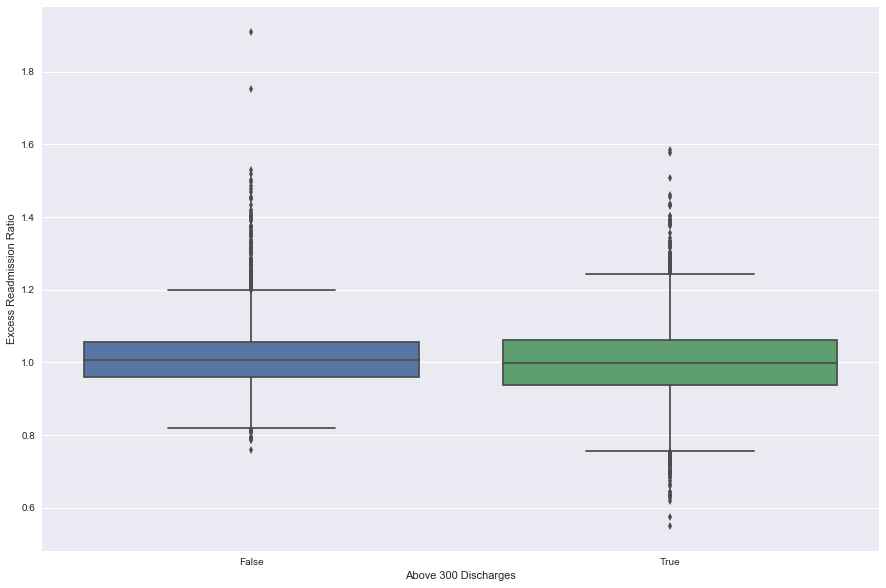

In [6]:
#add column for graph
clean_hospital_read_df['Above 300 Discharges'] = clean_hospital_read_df['Number of Discharges'] > 300

#increase  figure size
mpl.rcParams['figure.figsize'] = (15,10)

#boxplot showing same information in a more direct manner
sns.set()
sns.boxplot(y='Excess Readmission Ratio',x= 'Above 300 Discharges', data = clean_hospital_read_df)
plt.show()